In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import io
from google.colab import files
uploaded = files.upload()

Saving compresive_strength_concrete.csv to compresive_strength_concrete.csv


In [ ]:
data = pd.read_csv(io.StringIO(uploaded['compresive_strength_concrete.csv'].decode('utf-8')), sep = ',')

In [ ]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
data.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [ ]:
data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [ ]:
data.rename(columns={"Cement (component 1)(kg in a m^3 mixture)":'Cement',
                     "Blast Furnace Slag (component 2)(kg in a m^3 mixture)":'BlatFurnace_slag',
                      "Fly Ash (component 3)(kg in a m^3 mixture)":'Fly_ash',
                     "Water  (component 4)(kg in a m^3 mixture)": 'Water',
                      "Superplasticizer (component 5)(kg in a m^3 mixture)": 'Superplasticizer',
                     " Coarse Aggregate  (component 6)(kg in a m^3 mixture)":'Coarse Aggregate',
                      "Fine Aggregate (component 7)(kg in a m^3 mixture)":'Fine Aggregate',
                     "Age (day) ":'Age_day',
                     "Concrete compressive strength(MPa, megapascals) ":'Concrete_compressive_strength' }, inplace = True)

In [ ]:
data.head()

,Cement,BlastFurnace_slag,Fly_ash,Water,Superplasticizer,Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate,Age (day),Concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
import seaborn as sns

In [ ]:
corr = data.corr()

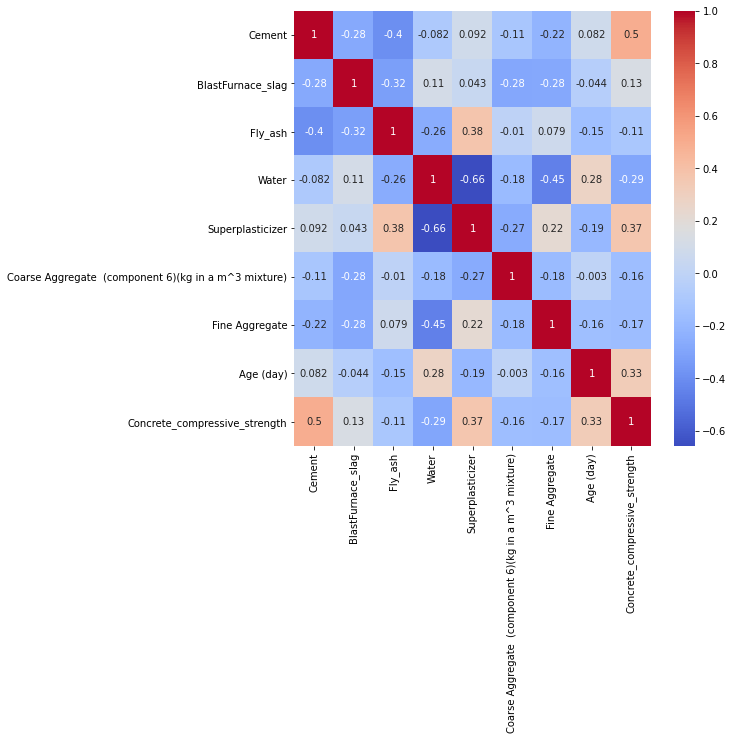

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(corr, cmap='coolwarm', annot=True)

In [ ]:
data.shape

(1030, 9)

In [ ]:
blast_mean = np.mean(data.BlastFurnace_slag)
data.BlastFurnace_slag=data.BlastFurnace_slag.mask(data.BlastFurnace_slag==0).fillna(blast_mean)

In [ ]:
fly_mean = np.mean(data.Fly_ash)
data.Fly_ash=data.Fly_ash.mask(data.Fly_ash==0).fillna(fly_mean)

In [ ]:
superplastic_mean = np.mean(data.Superplasticizer)
data.Superplasticizer=data.Superplasticizer.mask(data.Superplasticizer==0).fillna(superplastic_mean)

In [ ]:
data.head()

,Cement,BlastFurnace_slag,Fly_ash,Water,Superplasticizer,Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate,Age (day),Concrete_compressive_strength
0,540.0,73.895825,54.18835,162.0,2.50000,1040.0,676.0,28,79.99
1,540.0,73.895825,54.18835,162.0,2.50000,1055.0,676.0,28,61.89
2,332.5,142.500000,54.18835,228.0,6.20466,932.0,594.0,270,40.27
3,332.5,142.500000,54.18835,228.0,6.20466,932.0,594.0,365,41.05
4,198.6,132.400000,54.18835,192.0,6.20466,978.4,825.5,360,44.30


In [ ]:
y = data['Concrete_compressive_strength']
x = data.drop(columns='Concrete_compressive_strength') 
x

,Cement,BlastFurnace_slag,Fly_ash,Water,Superplasticizer,Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate,Age (day)
0,540.0,73.895825,54.18835,162.0,2.50000,1040.0,676.0,28
1,540.0,73.895825,54.18835,162.0,2.50000,1055.0,676.0,28
2,332.5,142.500000,54.18835,228.0,6.20466,932.0,594.0,270
3,332.5,142.500000,54.18835,228.0,6.20466,932.0,594.0,365
4,198.6,132.400000,54.18835,192.0,6.20466,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.000000,90.30000,179.6,8.90000,870.1,768.3,28
1026,322.2,73.895825,115.60000,196.0,10.40000,817.9,813.4,28
1027,148.5,139.400000,108.60000,192.7,6.10000,892.4,780.0,28
1028,159.1,186.700000,54.18835,175.6,11.30000,989.6,788.9,28


In [ ]:
X_train = data[:515]
Y_train = y[:515]

In [ ]:
X_train.shape

(515, 9)

In [ ]:
Y_train.shape

(515,)

In [ ]:
X_test = data[515:825]
Y_test = y[515:825]
X_val = data[825:1030]
Y_val = y[825:1030]

In [ ]:
X_val.shape

(205, 9)

In [ ]:
mean = X_train.iloc[: , 0:14].mean(axis=0)
X_train.iloc[: , 0:14] -= mean
std = X_train.iloc[:, 0:14].std(axis=0)
X_train.iloc[: , 0:14] /= std
X_train

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Cement,BlastFurnace_slag,Fly_ash,Water,Superplasticizer,Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate,Age (day),Concrete_compressive_strength
0,2.317058,-0.389921,-0.933736,-0.473765,-1.473836,0.808263,-1.197012,-0.358601,2.238902
1,2.317058,-0.389921,-0.933736,-0.473765,-1.473836,1.010574,-1.197012,-0.358601,1.163579
2,0.331683,0.847386,-0.933736,2.198444,-0.704261,-0.648378,-2.149023,3.142022,-0.120868
3,0.331683,0.847386,-0.933736,2.198444,-0.704261,-0.648378,-2.149023,4.516233,-0.074528
4,-0.949482,0.665228,-0.933736,0.740876,-0.704261,-0.022562,0.538667,4.443906,0.118555
...,...,...,...,...,...,...,...,...,...
510,1.207162,-1.325885,1.010157,0.174043,-0.227447,-2.131993,-0.337879,-0.662374,-0.196319
511,1.207162,-1.325885,1.010157,0.174043,-0.227447,-2.131993,-0.337879,0.046430,1.389931
512,1.207162,-1.325885,1.010157,-0.230837,-0.144354,-2.131993,-0.337879,-0.720236,-0.605654
513,1.207162,-1.325885,1.010157,-0.230837,-0.144354,-2.131993,-0.337879,-0.662374,-0.119680


In [ ]:
val_mean = X_val.iloc[:, 0:14].mean(axis=0)
val_std = X_val.iloc[:, 0:14].std(axis=0)
X_val.iloc[:, 0:14] -= val_mean
X_val.iloc[:, 0:14] /= val_std
X_val

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

,Cement,BlastFurnace_slag,Fly_ash,Water,Superplasticizer,Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate,Age (day),Concrete_compressive_strength
825,1.364093,-0.800229,-0.355682,-0.251463,-0.289912,0.895627,-0.522763,0.098640,0.710110
826,2.363434,-0.800229,-0.355682,0.144617,-0.289912,-0.479174,-0.718386,-10.891149,-0.444078
827,2.869125,-0.800229,-0.355682,-2.458200,-0.289912,-1.007944,1.914996,-9.132783,1.606765
828,2.869125,-0.800229,-0.355682,-2.458200,-0.289912,-1.007944,1.914996,0.098640,3.528841
829,-0.128898,-0.210913,0.241675,1.163111,0.488797,-0.902190,-1.335350,0.098640,0.559359
...,...,...,...,...,...,...,...,...,...
1025,0.776138,-0.338654,-0.444153,-0.411902,-0.173061,-0.424183,0.206037,0.098640,0.837870
1026,1.327582,-1.136381,0.099257,0.516060,0.244800,-1.114228,0.884698,0.098640,-0.190692
1027,-0.763810,0.104695,-0.051094,0.329336,-0.953068,-0.129394,0.382098,0.098640,-0.777993
1028,-0.636183,1.000864,-1.219784,-0.638233,0.495517,1.155516,0.516024,0.098640,-0.065851


In [ ]:
test_mean = X_test.iloc[:, 0:14].mean(axis=0)
test_std =  X_test.iloc[:, 0:14].std(axis=0)
X_test.iloc[:, 0:14] -= test_mean
X_test.iloc[:, 0:14] /= test_std
X_test

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

,Cement,BlastFurnace_slag,Fly_ash,Water,Superplasticizer,Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate,Age (day),Concrete_compressive_strength
515,-0.845420,-1.427327,4.279688,1.619069,-4.982873,-0.804606,0.335119,-0.248628,-0.350987
516,-0.845420,-1.427327,4.279688,1.619069,-4.982873,-0.804606,0.335119,-0.600824,-1.203028
517,-0.845420,-1.427327,4.279688,1.619069,-4.982873,-0.804606,0.335119,-0.544473,-0.836060
518,-0.845420,-1.427327,4.279688,1.619069,-4.982873,-0.804606,0.335119,0.145832,-0.261003
519,-0.057648,-1.371288,4.279688,-1.255201,-0.829216,-2.221972,0.335119,-0.248628,1.178749
...,...,...,...,...,...,...,...,...,...
820,2.257634,-0.546159,-0.232908,-0.190656,-0.058974,1.789172,-2.100168,3.160633,2.822373
821,0.307417,-0.546159,-0.232908,1.299706,-0.058974,-0.351049,0.322166,-0.445858,-0.435348
822,0.307417,-0.546159,-0.232908,1.299706,-0.058974,-0.351049,0.322166,-0.248628,-0.125323
823,0.307417,-0.546159,-0.232908,1.299706,-0.058974,-0.351049,0.322166,1.892726,0.184702


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [ ]:
network = Sequential()

In [ ]:
network.add(layers.Dense(6, activation='relu', input_shape=(X_train.shape[1],)))
network.add(layers.Dense(4, activation='relu'))
network.add(layers.Dense(1))

In [ ]:
network.compile(optimizer='adam', loss='mse', metrics='mae')

In [ ]:
history = network.fit(X_train, Y_train, batch_size=30, verbose=0, epochs=200, validation_data=(X_val, Y_val))

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, 201)

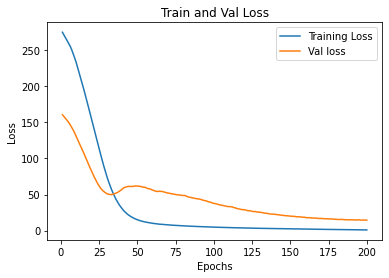

In [ ]:
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Val loss')
plt.title('Train and Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
mae_train = history.history['mae']
mae_val= history.history['val_mae']

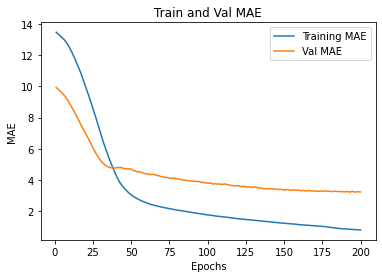

In [ ]:
plt.plot(epochs, mae_train, label='Training MAE')
plt.plot(epochs, mae_val, label='Val MAE')
plt.title('Train and Val MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [ ]:
prediction = network.predict(X_test)

In [ ]:
prediction.shape

(310, 1)

In [ ]:
test_mse_score, test_mae_score  =network.evaluate(X_test, Y_test)

10/10 [==============================] - 0s 1ms/step - loss: 7.2898 - mae: 2.3832
